<a href="https://colab.research.google.com/github/PaytonOAnderson/PotionShop/blob/main/Phishing_Detection_429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/ebubekirbbr/pdd/blob/master/input/data_phishing_37175.json

import json
import numpy as np
import os

# Load the phishing data from the JSON file
with open('data_legitimate_36400.json') as f:
    ldata = json.load(f)

# Load the legitimate data from the JSON file
with open('data_phishing_37175.json') as f:
    pdata = json.load(f)

# Create an empty array to store the combined data
combined_data = []

# Add the phishing data to the combined data array, and add a label of 1 to indicate that it is phishing
for item in pdata:
    combined_data.append([item, 1])

# Add the legitimate data to the combined data array, and add a label of 0 to indicate that it is legitimate
for item in ldata:
    combined_data.append([item, 0])

# Shuffle the combined data array
np.random.shuffle(combined_data)

# Convert the combined data array to a numpy array
combined_data = np.array(combined_data)

print(combined_data[:10])



[['http://www.slideserve.com/talbot/peripheral-nervous-system' '0']
 ['http://geoeducation.org/wp-includes/163/' '1']
 ['https://www.pendrivelinux.com/' '0']
 ['http://www.weathercity.com/tt/port_of_spain/' '0']
 ['http://wine.treyu.tk/image.htm' '1']
 ['https://www.bitdefender.com/solutions/' '0']
 ['https://vk.com/savethechildrenvk' '0']
 ['http://astrozet.net/Manual/swisseph.htm' '0']
 ['http://morewin-media.de/maus/baptismal-font-clipart' '0']
 ['https://www.saridity.com/wp-admin/network/komca/bivers/index.php?email=abuse@sce-hardware.com'
  '1']]


In [ ]:
import numpy as np

# Extract the links from the combined data
links = [item[0] for item in combined_data]

# Calculate the percentiles
percentiles = np.percentile(np.char.str_len(links), np.arange(0, 101))


In [ ]:
urls = []
labels = []

for item in combined_data:
  urls.append(item[0])
  labels.append(item[1])


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Tokenize the URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)

# Pad the sequences
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numpy array
labels = np.array(labels, dtype=int)

In [ ]:
import numpy as np
# Save the padded sequences to a file
np.save('padded_sequences.npy', padded_sequences)

# Save the labels to a file
np.save('labels.npy', labels)


In [8]:
# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=128, mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history1 = model1.fit(padded_sequences, labels, epochs=10, validation_split=0.2)
print(history1.history)

Epoch 1/10
 420/1840 [=====>........................] - ETA: 1:10:24 - loss: 0.5540 - accuracy: 0.8871

KeyboardInterrupt: 

In [ ]:

# Save the model
model1.save('model_1.keras')



In [ ]:
import tensorflow as tf

# Load the model
model1 = tf.keras.models.load_model('model_1.keras')


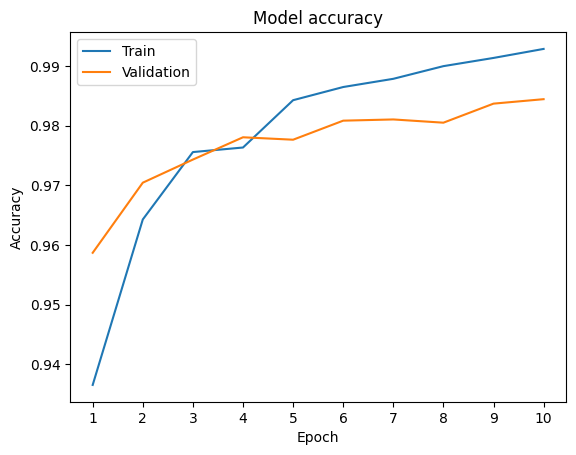

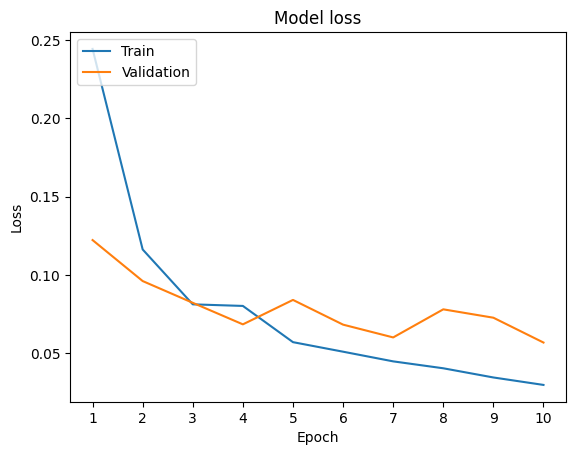

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot accuracy
plt.figure()
plt.plot(np.arange(1, len(history1.history['accuracy']) + 1), history1.history['accuracy'])
plt.plot(np.arange(1, len(history1.history['val_accuracy']) + 1), history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history1.history['accuracy']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure()
plt.plot(np.arange(1, len(history1.history['loss']) + 1), history1.history['loss'])
plt.plot(np.arange(1, len(history1.history['val_loss']) + 1), history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history1.history['loss']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

# Make predictions on the test data
predictions1 = model1.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions1)):
    if predictions1[i] > 0.5:
        predictions1[i] = 1
    else:
        predictions1[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions1)
print("Accuracy:", accuracy)


2300/2300 [==============================] - 27s 11ms/step
Accuracy: 0.9935032279986409


In [ ]:

# Calculate the number of true positives, false negatives, true negatives, and false positives.
tp = 0
fn = 0
tn = 0
fp = 0

for i in range(len(labels)):
  if labels[i] == 1 and predictions1[i] == 1:
    tp += 1
  elif labels[i] == 1 and predictions1[i] == 0:
    fn += 1
  elif labels[i] == 0 and predictions1[i] == 0:
    tn += 1
  elif labels[i] == 0 and predictions1[i] == 1:
    fp += 1

# Calculate the percentages of true positives, false negatives, true negatives, and false positives.
tp_percent = tp / (tp + fn) * 100
fn_percent = fn / (tp + fn) * 100
tn_percent = tn / (tn + fp) * 100
fp_percent = fp / (tn + fp) * 100

# Print the percentages of true positives, false negatives, true negatives, and false positives.
print("True Positives:", tp_percent)
print("False Negatives:", fn_percent)
print("True Negatives:", tn_percent)
print("False Positives:", fp_percent)


True Positives: 99.56960322797579
False Negatives: 0.43039677202420984
True Negatives: 99.12637362637363
False Positives: 0.8736263736263736


#Modifiying the model being created taking out the droupout layers

In [ ]:
# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=128, mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history2 = model2.fit(padded_sequences, labels, epochs=10, validation_split=0.2)
print(history2.history)

Epoch 1/10
1840/1840 [==============================] - 78s 38ms/step - loss: 0.2337 - accuracy: 0.9382 - val_loss: 0.1008 - val_accuracy: 0.9671
Epoch 2/10
1840/1840 [==============================] - 67s 36ms/step - loss: 0.0914 - accuracy: 0.9711 - val_loss: 0.1299 - val_accuracy: 0.9622
Epoch 3/10
1840/1840 [==============================] - 67s 37ms/step - loss: 0.0748 - accuracy: 0.9763 - val_loss: 0.0672 - val_accuracy: 0.9795
Epoch 4/10
1840/1840 [==============================] - 68s 37ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 5/10
1840/1840 [==============================] - 63s 34ms/step - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 6/10
1840/1840 [==============================] - 69s 37ms/step - loss: 0.0435 - accuracy: 0.9872 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 7/10
1840/1840 [==============================] - 63s 34ms/step - loss: 0.0421 - accuracy: 0.9890 - val_loss: 0.0763 -

In [ ]:
# Save the model
model2.save('model_2.keras')
# Load the model
model2 = tf.keras.models.load_model('model_2.keras')

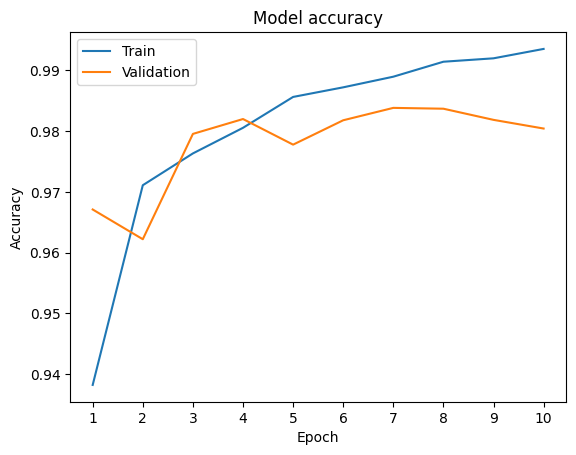

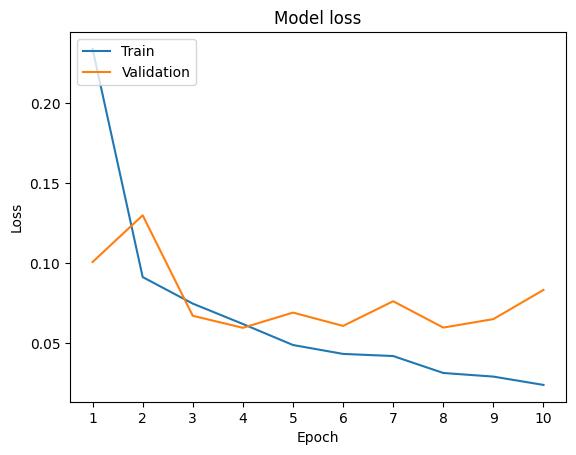

In [ ]:
# Plot accuracy
plt.figure()
plt.plot(np.arange(1, len(history2.history['accuracy']) + 1), history2.history['accuracy'])
plt.plot(np.arange(1, len(history2.history['val_accuracy']) + 1), history22.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history2.history['accuracy']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure()
plt.plot(np.arange(1, len(history2.history['loss']) + 1), history2.history['loss'])
plt.plot(np.arange(1, len(history2.history['val_loss']) + 1), history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history2.history['loss']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the test data
predictions2 = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions2)):
    if predictions2[i] > 0.5:
        predictions2[i] = 1
    else:
        predictions2[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions2)
print("Accuracy:", accuracy)

2300/2300 [==============================] - 29s 11ms/step
Accuracy: 0.9920353380903839


In [ ]:
# Calculate the number of true positives, false negatives, true negatives, and false positives.
tp = 0
fn = 0
tn = 0
fp = 0

for i in range(len(labels)):
  if labels[i] == 1 and predictions2[i] == 1:
    tp += 1
  elif labels[i] == 1 and predictions2[i] == 0:
    fn += 1
  elif labels[i] == 0 and predictions2[i] == 0:
    tn += 1
  elif labels[i] == 0 and predictions2[i] == 1:
    fp += 1

# Calculate the percentages of true positives, false negatives, true negatives, and false positives.
tp_percent = tp / (tp + fn) * 100
fn_percent = fn / (tp + fn) * 100
tn_percent = tn / (tn + fp) * 100
fp_percent = fp / (tn + fp) * 100

# Print the percentages of true positives, false negatives, true negatives, and false positives.
print("True Positives:", tp_percent)
print("False Negatives:", fn_percent)
print("True Negatives:", tn_percent)
print("False Positives:", fp_percent)

True Positives: 98.773369199731
False Negatives: 1.226630800268998
True Negatives: 99.64285714285714
False Positives: 0.35714285714285715


# Modifiying the model being created, removing layer tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))

In [ ]:
# Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=128, mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history3 = model3.fit(padded_sequences, labels, epochs=10, validation_split=0.2)
print(history3.history)

Epoch 1/10
1840/1840 [==============================] - 42s 20ms/step - loss: 0.2502 - accuracy: 0.9342 - val_loss: 0.0950 - val_accuracy: 0.9701
Epoch 2/10
1840/1840 [==============================] - 35s 19ms/step - loss: 0.1050 - accuracy: 0.9685 - val_loss: 0.0902 - val_accuracy: 0.9687
Epoch 3/10
1840/1840 [==============================] - 33s 18ms/step - loss: 0.0847 - accuracy: 0.9751 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 4/10
1840/1840 [==============================] - 35s 19ms/step - loss: 0.0731 - accuracy: 0.9795 - val_loss: 0.0662 - val_accuracy: 0.9808
Epoch 5/10
1840/1840 [==============================] - 33s 18ms/step - loss: 0.0587 - accuracy: 0.9839 - val_loss: 0.0717 - val_accuracy: 0.9789
Epoch 6/10
1840/1840 [==============================] - 34s 18ms/step - loss: 0.0519 - accuracy: 0.9864 - val_loss: 0.1241 - val_accuracy: 0.9747
Epoch 7/10
1840/1840 [==============================] - 35s 19ms/step - loss: 0.0453 - accuracy: 0.9881 - val_loss: 0.0653 -

In [ ]:
# Save the model
model3.save('model_3.keras')
# Load the model
model3 = tf.keras.models.load_model('model_3.keras')
# Plot accuracy
plt.figure()
plt.plot(np.arange(1, len(history3.history['accuracy']) + 1), history3.history['accuracy'])
plt.plot(np.arange(1, len(history3.history['val_accuracy']) + 1), history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history3.history['accuracy']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure()
plt.plot(np.arange(1, len(history3.history['loss']) + 1), history3.history['loss'])
plt.plot(np.arange(1, len(history3.history['val_loss']) + 1), history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history3.history['loss']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the test data
predictions3 = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions3)):
    if predictions3[i] > 0.5:
        predictions3[i] = 1
    else:
        predictions3[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions3)
print("Accuracy:", accuracy)

#Model4

In [ ]:
# Create the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=128, mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history4 = model1.fit(padded_sequences, labels, epochs=10, validation_split=0.2)
print(history4.history)

In [ ]:
# Save the model
model4.save('model_4.keras')
# Load the model
model4 = tf.keras.models.load_model('model_4.keras')
# Plot accuracy
plt.figure()
plt.plot(np.arange(1, len(history4.history['accuracy']) + 1), history4.history['accuracy'])
plt.plot(np.arange(1, len(history4.history['val_accuracy']) + 1), history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history4.history['accuracy']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure()
plt.plot(np.arange(1, len(history4.history['loss']) + 1), history4.history['loss'])
plt.plot(np.arange(1, len(history4.history['val_loss']) + 1), history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history3.history['loss']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the test data
predictions4 = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions4)):
    if predictions4[i] > 0.5:
        predictions4[i] = 1
    else:
        predictions4[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions4)
print("Accuracy:", accuracy)

#Feature Extraction

In [ ]:
# Feature	Explanation
# Raw Word Count	The number of words obtained after parsing the URL by special characters.
# Brand Check for Domain	Is domain of the analyzed URL in the brand name list?
# Average Word Length	The average length of the words in the raw word list.
# Longest Word Length	The length of the longest word in the raw word list.

import numpy as np
import re
import collections

def parse_url(url):
  # Extract the domain name
  domain = url.split(".")[1]

  # Split the URL into words
  words = re.split('[^a-zA-Z]', url)

  # Remove empty strings
  words = [word for word in words if word]

  # Count the number of words
  raw_word_count = len(words)

  # Check if the domain is in the brand name list
  brand_check_for_domain = 1 if domain in ["google.com", "facebook.com", "amazon.com"] else 0

  # Calculate the average word length
  total_word_length = sum(len(word) for word in words)
  average_word_length = total_word_length / raw_word_count

  # Calculate the longest word length
  longest_word_length = max(len(word) for word in words)

  return [raw_word_count, brand_check_for_domain, average_word_length, longest_word_length]

# Parse the URLs in the combined_data array
parsed_data = []
for item in combined_data:
  parsed_data.append([item[0], *parse_url(item[0]), item[1]])

# Convert the parsed data to a numpy array
parsed_data = np.array(parsed_data)

# Print the first 10 rows of the parsed data
print(parsed_data[:10])


[['http://marcel-niemyjski.eu/approve.htm' '6' '0' '5.166666666666667'
  '9' '1']
 ['http://www.sirc.org/publik/binge_drinking.shtml' '8' '0' '4.75' '8'
  '0']
 ['https://en.wikibooks.org/wiki/Open_Source' '7' '0' '4.714285714285714'
  '9' '0']
 ['http://youraid.org.au/review0/adobe/' '6' '0' '4.5' '7' '1']
 ['http://lmrports.com/kato/index.html.htm' '7' '0' '4.428571428571429'
  '8' '1']
 ['http://localpastures.com.au/media/' '5' '0' '5.4' '13' '1']
 ['http://bestpuppiesusa.com/dhjgd/GD/' '5' '0' '5.6' '14' '1']
 ['http://heilpraktikerin-edhofer.de/wp-includes/pomo/zooominfo/web.php'
  '10' '0' '5.7' '15' '1']
 ['http://sweetpack.home.pl/sklep.backup/tmp/Y!/T/Y1.html' '11' '0'
  '3.6363636363636362' '9' '1']
 ['http://www.libroesoterico.com/biblioteca/Textos%20sagrados%20y%20antiguos/Sumerian%20Hymns.pdf'
  '12' '0' '6.083333333333333' '14' '0']]


In [ ]:

import pandas as pd

# Open the xlsx file
df = pd.read_excel('data.xlsx')

# Convert the xlsx file to a numpy array
data = df.to_numpy()

# Print the first 10 rows of the numpy array

edited_data = []
for item in data:
  edited_data.append([item[1], item[0]])

print(edited_data[:10])


[['http://dbs.vote-friend.com/sg?ref=anything', 1], ['https://www.reynoldstransfer.com/versa-lift-fork-truck/', 0], ['https://www.halisupportservice.com/Login.php', 1], ['https://www.signets.com.br/wp-includes/wlwmanifest.xml', 0], ['https://docs.google.com/document/d/e/2PACX-1vTS9czxqyCsGi-QUifs7m1MqJZMLCjLcCNhW3DsaHdss5ymnPy6y0VSGwvF3pIu6js22Ydjyew1OyO_/pub?embedded=true', 1], ['https://www.iwestco.com/virtual-consult/', 0], ['https://is.gd/N19JOz', 1], ['https://httpsservices.runescape.com-ov.ru/', 1], ['https://viandjo.com/website/membership/service/billing.php?SessionID-xb=NL.=.3754672._.4d1d7fa8d72fb5318fdf3baed95a10e7.=.Netherlands', 1], ['https://www.millect.com/Plans/tabid/76/Default.aspx', 0]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

urls = []
labels = []

for item in edited_data:
  urls.append(item[0])
  labels.append(item[1])


# Tokenize the URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)

# Pad the sequences
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numpy array
labels = np.array(labels, dtype=int)


# Make predictions on the test data
predictions = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)


625/625 [==============================] - 10s 11ms/step
Accuracy: 0.5833


In [ ]:

# Calculate the number of true positives, false negatives, true negatives, and false positives.
tp = 0
fn = 0
tn = 0
fp = 0

for i in range(len(labels)):
  if labels[i] == 1 and predictions[i] == 1:
    tp += 1
  elif labels[i] == 1 and predictions[i] == 0:
    fn += 1
  elif labels[i] == 0 and predictions[i] == 0:
    tn += 1
  elif labels[i] == 0 and predictions[i] == 1:
    fp += 1

# Calculate the percentages of true positives, false negatives, true negatives, and false positives.
tp_percent = tp / (tp + fn) * 100
fn_percent = fn / (tp + fn) * 100
tn_percent = tn / (tn + fp) * 100
fp_percent = fp / (tn + fp) * 100

# Print the percentages of true positives, false negatives, true negatives, and false positives.
print("True Positives:", tp_percent)
print("False Negatives:", fn_percent)
print("True Negatives:", tn_percent)
print("False Positives:", fp_percent)


True Positives: 62.35000000000001
False Negatives: 37.65
True Negatives: 54.31
False Positives: 45.69
